<a href="https://colab.research.google.com/github/jahidurmahim/Software_testing_Quality_Assurance_lab/blob/main/StqaLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB-1 (13.01.2026)

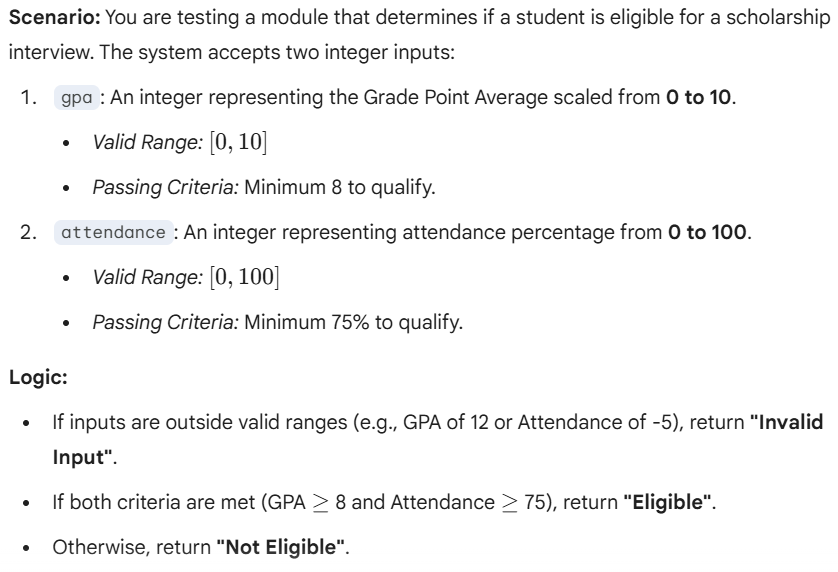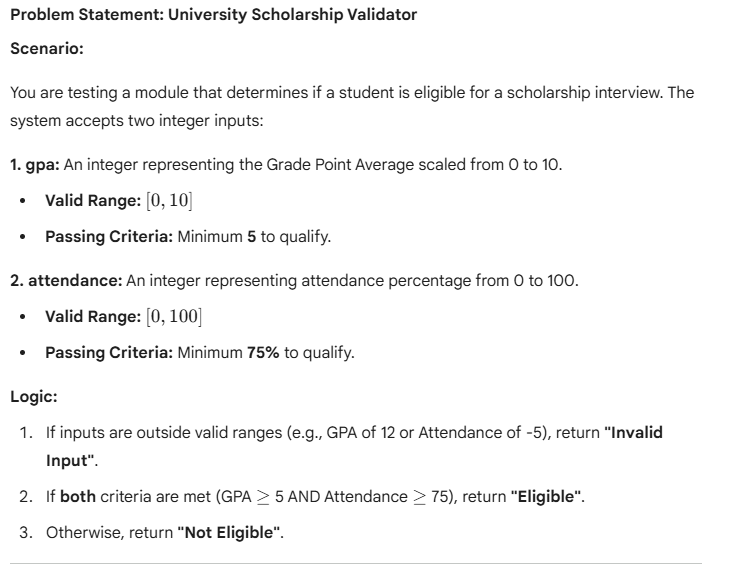

# Task 1

**Task 1:** Identify the Boundaries

**Task 2:** Design BVC Test Cases (4n + 1)

**Task 3:** Design Robustness Test Case

**Task 4:** Design Worst Case Test Case

**Task 5:** Find the Bug


In [ ]:
def check_scholarship(gpa, attendance):
    # 1. Validation Logic (Robustness checks)
    if gpa < 0 or gpa > 10:
        return "Invalid Input: GPA out of range"
    if attendance < 0 or attendance > 100:
        return "Invalid Input: Attendance out of range"

    # 2. Business Logic (Boundary checks)
    # NOTE: There is a deliberate boundary error here for you to find!
    # Requirement says Minimum 5 GPA, but code uses > 5
    if gpa > 5 and attendance >= 75:
        return "Eligible"
    else:
        return "Not Eligible"

# --- Test Runner Helpers ---
def run_test(case_id, test_gpa, test_att, expected):
    result = check_scholarship(test_gpa, test_att)
    print(f"Case {case_id}: Inputs({test_gpa}, {test_att}) -> Actual: {result} | Expected: {expected}")

# Example Manual Test Run (Nominal Case)
if __name__ == "__main__":
    print("--- Starting Lab Tests ---")
    run_test(1, 7, 80, "Eligible") # Nominal Case

--- Starting Lab Tests ---
Case 1: Inputs(7, 80) -> Actual: Eligible | Expected: Eligible


# Task 2

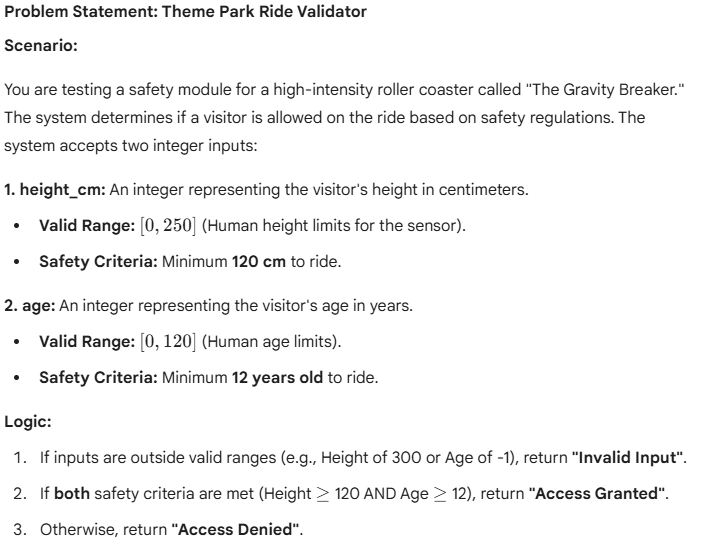

Perform Boundary Value Analysis using the range $[0, 250]$ , $[0, 120]$

**Task 1:** Identify the Boundaries

**Task 2:** Design BVC Test Cases (4n + 1)

**Task 3:** Design Robustness Test Case

**Task 4:** Design Worst Case Test Case

**Task 5:** Find the Bug


In [ ]:
def check_ride_access(height_cm, age):
    # 1. Validation Logic (Robustness checks)
    if height_cm < 0 or height_cm > 250:
        return "Invalid Input: Height out of range"

    if age < 0 or age > 120:
        return "Invalid Input: Age out of range"

    # 2. Business Logic (Boundary checks)
    # NOTE: There is a deliberate boundary error here for you to find!
    # Requirement says Minimum 12 years old, but code uses > 12
    if height_cm >= 120 and age > 12:
        return "Access Granted"
    else:
        return "Access Denied"

# --- Test Runner Helpers ---
def run_test(case_id, test_h, test_a, expected):
    result = check_ride_access(test_h, test_a)
    status = "PASS" if result == expected else "FAIL"
    print(f"Case {case_id}: Inputs({test_h}, {test_a}) -> Actual: {result} | Expected: {expected}")

# Example Manual Test Run (Nominal Case)
if __name__ == "__main__":
    print("--- Starting Lab Tests ---")
    run_test(6, 150, 12, "Access Denied") # Nominal Case

--- Starting Lab Tests ---
Case 6: Inputs(150, 12) -> Actual: Access Denied | Expected: Access Denied


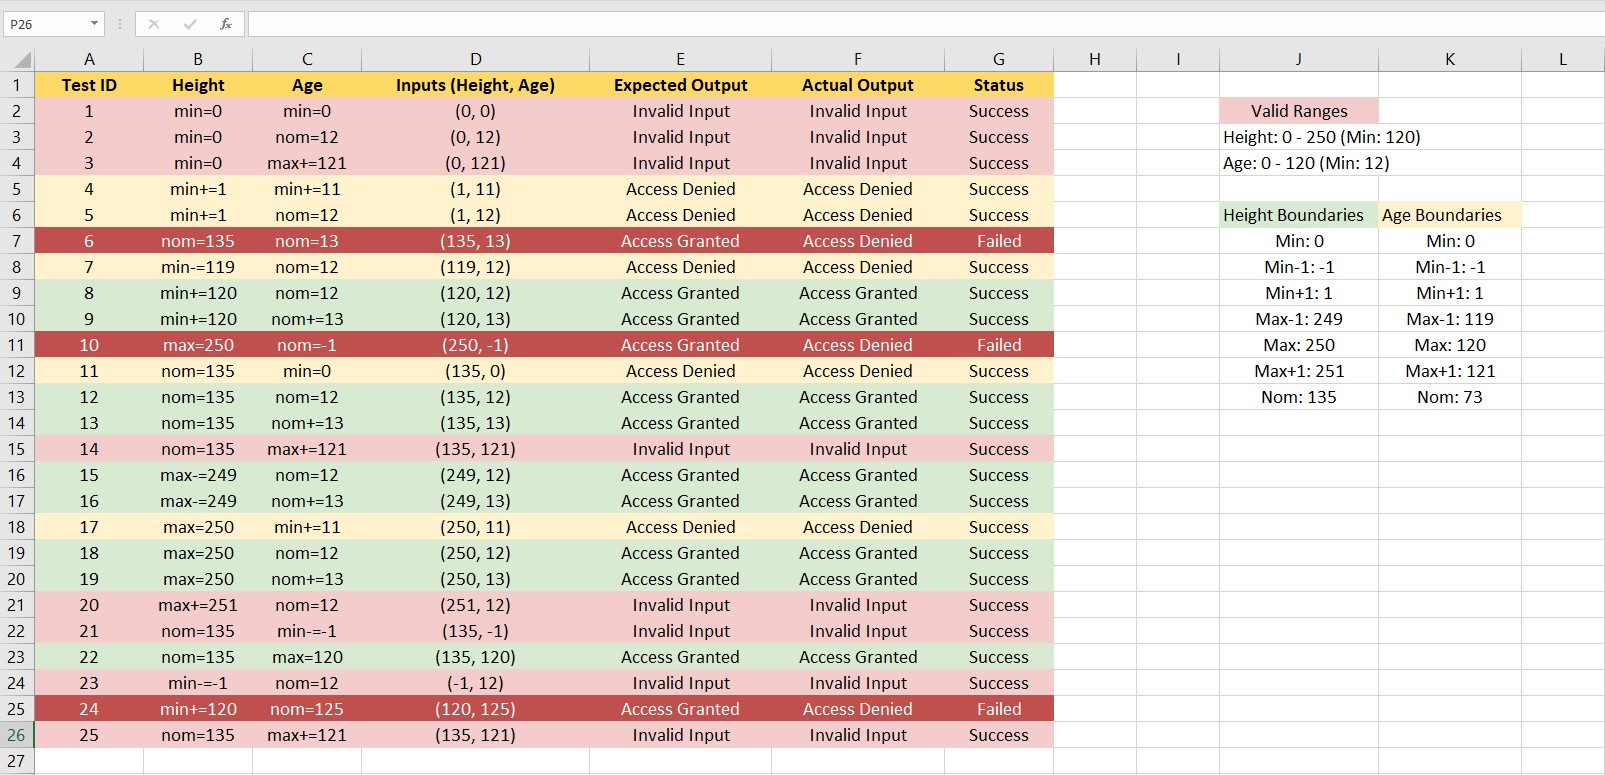

#Lab-2 (20.1.2026)

#TASK-1

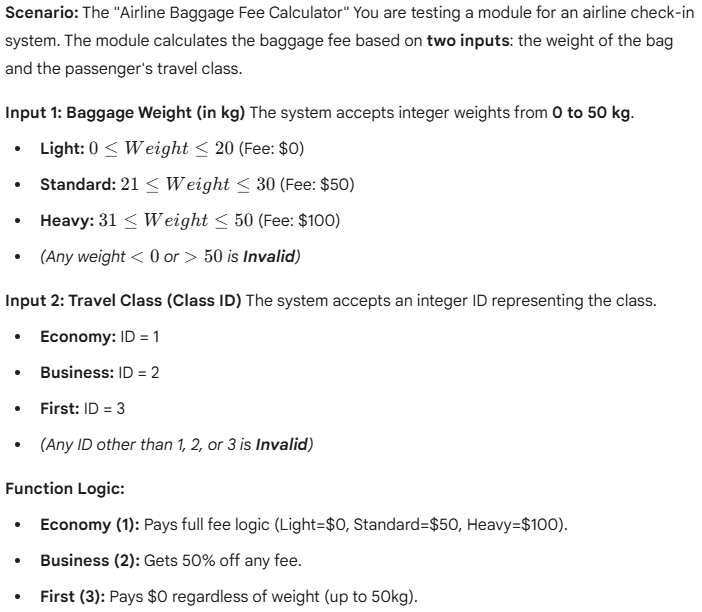

Task-1 ==> Define Equivalence Classes

Task-2 ==> Generate Test Cases

Task-3 ==> Tabulate them


In [ ]:
def calculate_baggage_fee(weight, class_id):
    """
    Calculates baggage fee based on weight and travel class.

    Args:
        weight (int): Weight in kg (0-50).
        class_id (int): 1=Economy, 2=Business, 3=First.

    Returns:
        float: The calculated fee.
        str: "Invalid Input" if inputs are out of range.
    """
    # 1. Input Validation (Robustness Check)
    if not isinstance(weight, int) or not isinstance(class_id, int):
        return "Invalid Input"

    if weight < 0 or weight > 50:
        return "Invalid Input"

    if class_id not in [1, 2, 3]:
        return "Invalid Input"

    # 2. Base Fee Logic
    fee = 0
    if 0 <= weight <= 20:
        fee = 0
    elif 21 <= weight <= 30:
        fee = 50
    elif 31 <= weight <= 50:
        fee = 100

    # 3. Class Modifier Logic
    if class_id == 2:      # Business Class
        fee = fee * 0.5
    elif class_id == 3:    # First Class
        fee = 0

    return float(fee)

# Quick manual check (Optional)
if __name__ == "__main__":
    print(f"Test Run (25kg, Economy): {calculate_baggage_fee(60, 1)}")

Test Run (25kg, Economy): Invalid Input


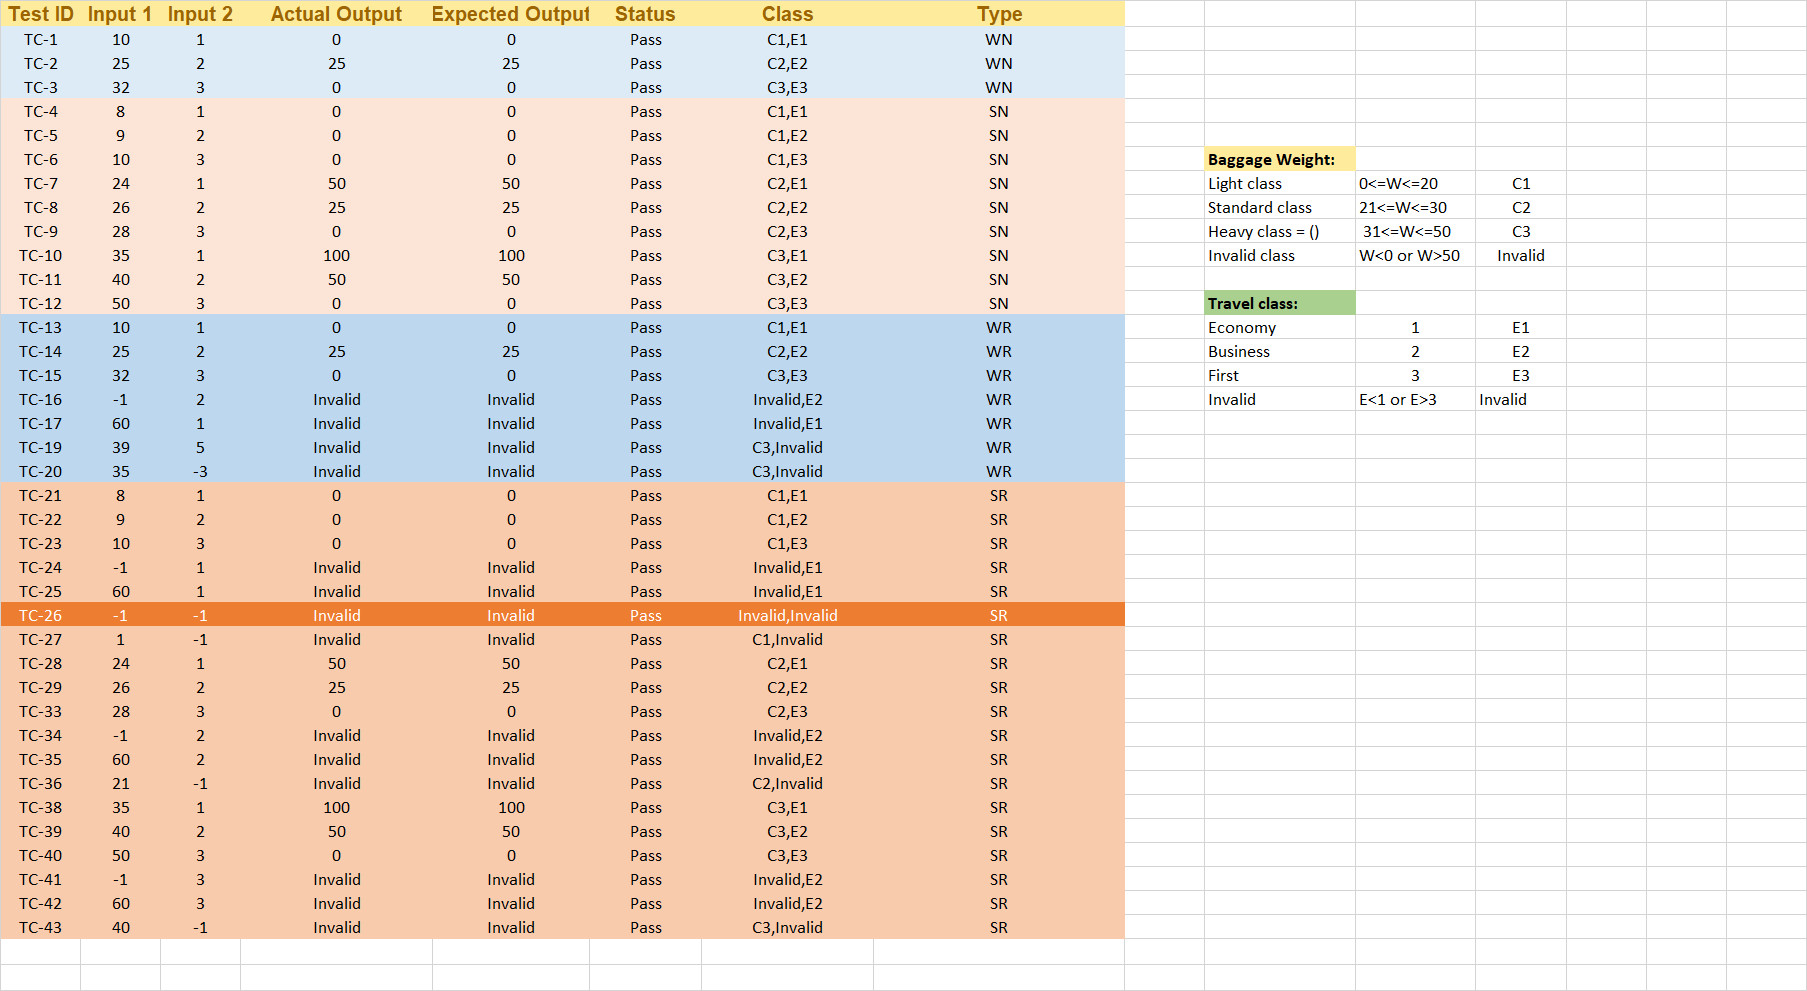

# TASK 2

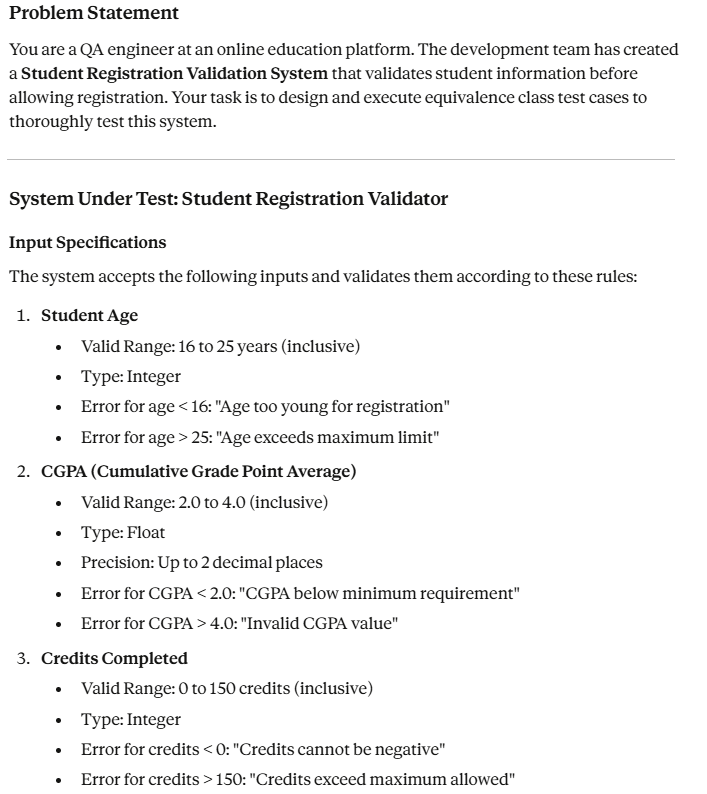

Example of adding a new test case:
    run_test_case(validator, "TC008", 18, 2.5, 100, "Registration Approved")

Example 1: Valid inputs === "Registration Approved"
    
Example 2: Invalid age - too young === "Age too young for registration"
    
Example 3: Invalid age - too old === "Age exceeds maximum limit"
    
Example 4: Invalid CGPA - too low === "CGPA below minimum requirement"
    
Example 5: Invalid CGPA - too high === "Invalid CGPA value"
    
Example 6: Invalid credits - negative === "Credits cannot be negative"
    
Example 7: Invalid credits - too many === "Credits exceed maximum allowed"

In [ ]:
"""
Student Registration Validation System
Lab Exercise for Equivalence Class Testing

This system validates student registration information.
Students should use this code to practice equivalence class testing.
"""

class StudentRegistrationValidator:
    """
    Validates student registration data based on specified rules.
    """

    # Define validation ranges
    MIN_AGE = 16
    MAX_AGE = 25
    MIN_CGPA = 2.0
    MAX_CGPA = 4.0
    MIN_CREDITS = 0
    MAX_CREDITS = 150

    def __init__(self):
        self.validation_errors = []

    def validate_registration(self, age, cgpa, credits):
        """
        Validates student registration information.

        Parameters:
        -----------
        age : int
            Student's age (should be between 16 and 25)
        cgpa : float
            Cumulative GPA (should be between 2.0 and 4.0)
        credits : int
            Completed credits (should be between 0 and 150)

        Returns:
        --------
        str : Validation result message
        """
        self.validation_errors = []

        # Validate Age
        if not isinstance(age, int):
            return "Invalid age format - must be an integer"

        if age < self.MIN_AGE:
            return "Age too young for registration"

        if age > self.MAX_AGE:
            return "Age exceeds maximum limit"

        # Validate CGPA
        if not isinstance(cgpa, (int, float)):
            return "Invalid CGPA format - must be a number"

        if cgpa < self.MIN_CGPA:
            return "CGPA below minimum requirement"

        if cgpa > self.MAX_CGPA:
            return "Invalid CGPA value"

        # Validate Credits
        if not isinstance(credits, int):
            return "Invalid credits format - must be an integer"

        if credits < self.MIN_CREDITS:
            return "Credits cannot be negative"

        if credits > self.MAX_CREDITS:
            return "Credits exceed maximum allowed"

        # All validations passed
        return "Registration Approved"

    def get_validation_summary(self):
        """Returns a summary of validation ranges"""
        return {
            "age_range": f"{self.MIN_AGE} to {self.MAX_AGE}",
            "cgpa_range": f"{self.MIN_CGPA} to {self.MAX_CGPA}",
            "credits_range": f"{self.MIN_CREDITS} to {self.MAX_CREDITS}"
        }


def run_test_case(validator, test_id, age, cgpa, credits, expected_output):
    """
    Helper function to run a single test case and display results.

    Parameters:
    -----------
    validator : StudentRegistrationValidator
        The validator instance
    test_id : str
        Test case identifier
    age : int
        Student age
    cgpa : float
        Student CGPA
    credits : int
        Completed credits
    expected_output : str
        Expected validation result
    """
    actual_output = validator.validate_registration(age, cgpa, credits)
    status = "PASS" if actual_output == expected_output else "FAIL"

    print(f"\n{'='*70}")
    print(f"Test Case ID: {test_id}")
    print(f"{'='*70}")
    print(f"Inputs:")
    print(f"  Age:     {age}")
    print(f"  CGPA:    {cgpa}")
    print(f"  Credits: {credits}")
    print(f"\nExpected Output: {expected_output}")
    print(f"Actual Output:   {actual_output}")
    print(f"\nTest Status: {status}")
    print(f"{'='*70}")

    return status == "PASS"


def main():
    """
    Main function demonstrating how to use the validator.
    Students should modify this to run their test cases.
    """
    print("\n" + "="*70)
    print("STUDENT REGISTRATION VALIDATION SYSTEM - TEST SUITE")
    print("="*70)

    # Create validator instance
    validator = StudentRegistrationValidator()

    # Display validation rules
    print("\nValidation Rules:")
    summary = validator.get_validation_summary()
    print(f"  Age Range:     {summary['age_range']} years")
    print(f"  CGPA Range:    {summary['cgpa_range']}")
    print(f"  Credits Range: {summary['credits_range']}")

    # Example test cases (students should expand this)
    print("\n" + "="*70)
    print("RUNNING EXAMPLE TEST CASES")
    print("="*70)

    test_results = []

    # Example 1: Valid inputs (Weak Normal)
    test_results.append(
        run_test_case(validator, "TC001", 20, 3.0, 75, "Registration Approved")
    )

    # Example 2: Invalid age - too young (Weak Robust)
    test_results.append(
        run_test_case(validator, "TC002", 15, 3.0, 75, "Age too young for registration")
    )

    # Example 3: Invalid age - too old (Weak Robust)
    test_results.append(
        run_test_case(validator, "TC003", 26, 3.0, 75, "Age exceeds maximum limit")
    )

    # Example 4: Invalid CGPA - too low (Weak Robust)
    test_results.append(
        run_test_case(validator, "TC004", 20, 1.5, 75, "CGPA below minimum requirement")
    )

    # Example 5: Invalid CGPA - too high (Weak Robust)
    test_results.append(
        run_test_case(validator, "TC005", 20, 4.5, 75, "Invalid CGPA value")
    )

    # Example 6: Invalid credits - negative (Weak Robust)
    test_results.append(
        run_test_case(validator, "TC006", 20, 3.0, -10, "Credits cannot be negative")
    )

    # Example 7: Invalid credits - too many (Weak Robust)
    test_results.append(
        run_test_case(validator, "TC007", 20, 3.0, 160, "Credits exceed maximum allowed")
    )

    test_results.append(
        run_test_case(validator, "TC008", 0, 0, 0, "Credits negetive")
    )


if __name__ == "__main__":
    main()


STUDENT REGISTRATION VALIDATION SYSTEM - TEST SUITE

Validation Rules:
  Age Range:     16 to 25 years
  CGPA Range:    2.0 to 4.0
  Credits Range: 0 to 150

RUNNING EXAMPLE TEST CASES

Test Case ID: TC001
Inputs:
  Age:     20
  CGPA:    3.0
  Credits: 75

Expected Output: Registration Approved
Actual Output:   Registration Approved

Test Status: PASS

Test Case ID: TC002
Inputs:
  Age:     15
  CGPA:    3.0
  Credits: 75

Expected Output: Age too young for registration
Actual Output:   Age too young for registration

Test Status: PASS

Test Case ID: TC003
Inputs:
  Age:     26
  CGPA:    3.0
  Credits: 75

Expected Output: Age exceeds maximum limit
Actual Output:   Age exceeds maximum limit

Test Status: PASS

Test Case ID: TC004
Inputs:
  Age:     20
  CGPA:    1.5
  Credits: 75

Expected Output: CGPA below minimum requirement
Actual Output:   CGPA below minimum requirement

Test Status: PASS

Test Case ID: TC005
Inputs:
  Age:     20
  CGPA:    4.5
  Credits: 75

Expected Output: 

#Lab-3 (27.1.2026)

# TASK-1

Library Book Fine Calculation System

A public library has three types of members and charges fines for overdue books according to the following procedure:

* For Senior Citizens (age 60+), a flat fine of Rs 2 per day is charged  irrespective of the book type or overdue duration.

* For overdue periods of more than 30 days, Regular Members pay Rs 10 per day and Student Members pay Rs 7 per day.

* For overdue periods of 15 days or more and up to 30 days, Regular Members pay Rs 7 per day and Student Members pay Rs 5 per day.

* For overdue periods of less than 15 days, Regular Members pay Rs 5 per day and Student Members pay Rs 3 per day.

The above rules do not apply to Reference Books wherein a flat rate of Rs 15 per day is applicable to all members irrespective of the overdue duration.

    
    Parameters:
    - member_type: 'senior_citizen', 'regular', 'student'
    - overdue_days: number of days the book is overdue
    - book_type: 'reference' or 'general'
    - age: age of the member (required for senior citizen validation)

in this function, calculate_library_fine('regular', 25, 'general'), write the test case

here the function has parameters, **calculate_library_fine('membertype', Days Overdue, 'book type')**

for expected value, change values based on logic and write your expected value

TASKS


*   Write the conditions and actions.  
*   Form a Limited Entry Decision Table Structure
*   Write the test cases
*   Find the bug


In [ ]:
def calculate_library_fine(member_type, overdue_days, book_type, age=0):
    """
    Calculate library fine based on member type, overdue days, and book type.

    Parameters:
    - member_type: 'senior_citizen', 'regular', 'student'
    - overdue_days: number of days the book is overdue
    - book_type: 'reference' or 'general'
    - age: age of the member (required for senior citizen validation)

    Returns:
    - Total fine amount in Rs
    """

    # Reference books have flat rate for all members
    if book_type == 'reference':
        return overdue_days * 15

    # Senior citizens get flat rate
    if member_type == 'senior_citizen' and age >= 60:
        return overdue_days * 2

    # Calculate fine based on member type and overdue duration
    if member_type == 'regular':
        if overdue_days > 30:
            fine_per_day = 10
        elif overdue_days > 15:
            fine_per_day = 7
        else:
            fine_per_day = 5

    elif member_type == 'student':
        if overdue_days > 30:
            fine_per_day = 7
        elif overdue_days >= 15:
            fine_per_day = 5
        else:
            fine_per_day = 3

    else:
        return "Invalid member type"

    return overdue_days * fine_per_day


# Test cases
print(f"Write the test cases")


print("Test Case 1 - Regular member, 15 days overdue, general book:")
print(f"Fine: Rs {calculate_library_fine('regular', 17, 'reference',45)}")
print(f"Expected: Rs {255} ")
print()


Write the test cases
Test Case 1 - Regular member, 15 days overdue, general book:
Fine: Rs 255
Expected: Rs 255 



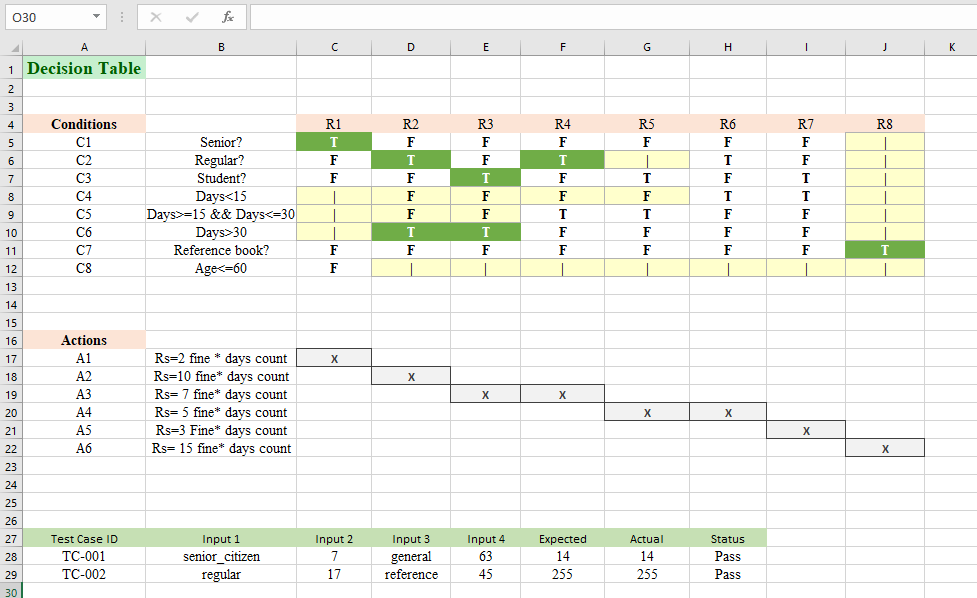

# Task-2

An electronics retailer sells various gadgets and has three tiers of customers: VIP, Corporate, and Standard. Discounts are applied as follows:

**VIP Members:** Receive a flat 15% discount regardless of the order value.

**Corporate Orders:**

* Orders over **USD** 10,000: 12% discount.

* Orders between **USD** 5,000 and **USD** 10,000: 10% discount.

* Orders below **USD** 5,000: 7% discount.

**Standard Customers:**

* Orders over **USD** 10,000: 10% discount.

* Orders between **USD** 5,000 and **USD** 10,000: 5% discount.

* Orders below **USD** 5,000: No discount (0%).

**The "Clearance" Exception:** The rules above do not apply to items marked as "**Clearance**." Clearance items have a fixed **20% discount** for everyone, regardless of customer type or order total.

TASKS


*   Write the conditions and actions.  
*   Form a Limited Entry Decision Table Structure
*   Write the test cases
*   Find the bug


In [ ]:
def get_discount(customer_type, order_value, is_clearance):
    # Rule 4: Clearance override
    if is_clearance:
        return 0.20

    # Rule 1: VIP Flat Rate
    if customer_type == "VIP":
        return 0.15

    # Rule 2: Corporate Tier
    elif customer_type == "Corporate":
        if order_value > 10000:
            return 0.12
        elif order_value > 5000:
            return 0.10
        else:
            return 0.07

    # Rule 3: Standard Tier
    elif customer_type == "Standard":
        if order_value > 10000:
            return 0.10
        elif order_value > 5000:
            return 0.05
        else:
            return 0.00

    return 0.00

# Testing the logic
print(f"Discount for $5,000 Corporate order: {get_discount('Standard', 10000, False) * 100}%")

Discount for $5,000 Corporate order: 5.0%


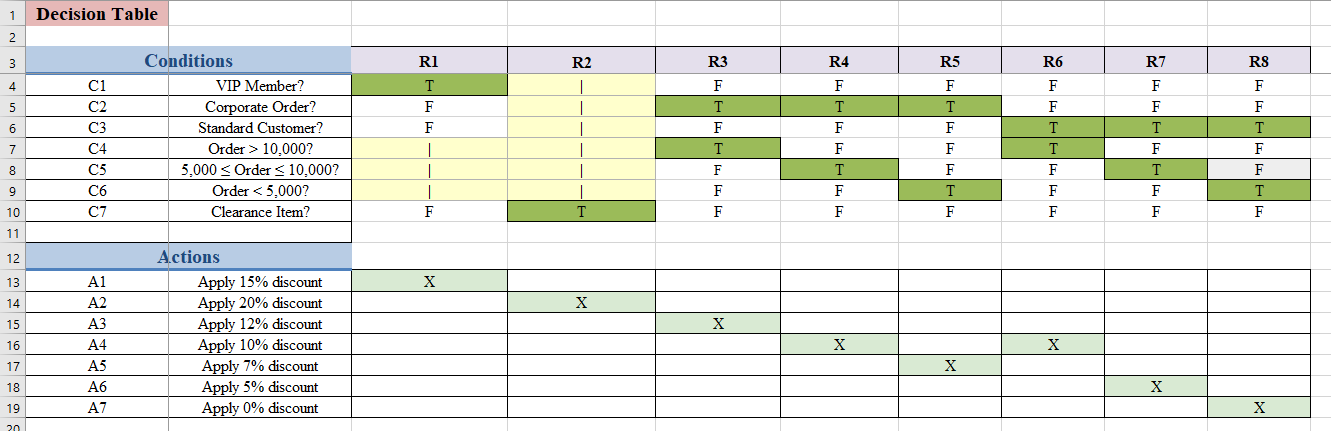

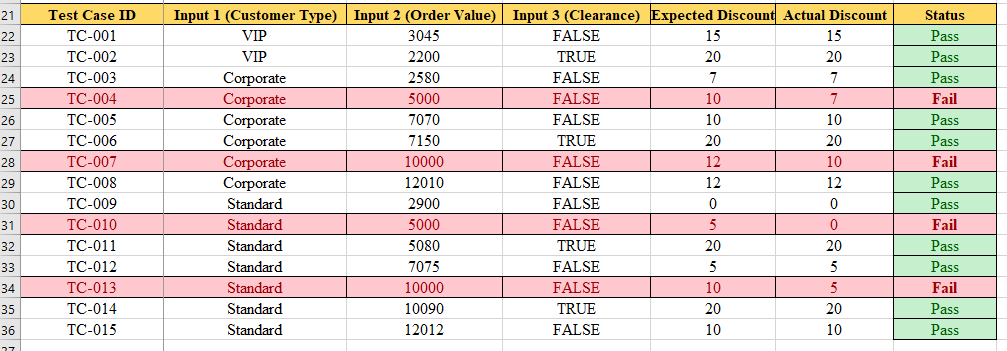